In [1]:
import os
import sys
sys.path.append('../../../utils')  # Adds the parent directory to the system path
sys.path.append('../../../models')  # Adds the parent directory to the system path


In [2]:
import dataloader as dl

/home/sfonseka/miniconda3/envs/conda_env/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
CLASS_NAME = 'asphalt'
EXPERIMENT_MODEL = 'UNET'
DATASET_VARIANT = 'binary_grayscale'

now = 1704589116

IMG_DIR = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/images/512/{CLASS_NAME}'
LABEL_DIR = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/train/512/{CLASS_NAME}'
VAL_DIR = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/val/512/{CLASS_NAME}'

EXPERIMENT_NAME= f'{EXPERIMENT_MODEL}_{DATASET_VARIANT}_{CLASS_NAME}'
EXPERIMENT_NAME_VERSION = f'{EXPERIMENT_MODEL}_{DATASET_VARIANT}_{CLASS_NAME}_{now}'

RESULT_DIR = f'runs/{EXPERIMENT_NAME_VERSION}'
LOG_DIR = f'runs/{EXPERIMENT_NAME_VERSION}/logs'
TENSOIRBOARD_DIR = f'runs/{EXPERIMENT_NAME_VERSION}/tensorboard'

MODEL_SAVE_PATH = f'runs/{EXPERIMENT_NAME_VERSION}/models'

MASK_COUNT = 99999

In [4]:
ANALYSIS_DIR = f'/home/sfonseka/dev/SRST/srst-analysis/{EXPERIMENT_NAME_VERSION}/analysis'

In [5]:
# Load pickle
import pickle
with open(f'{ANALYSIS_DIR}/test_images.pickle', 'rb') as f:
    test_images_pickle = pickle.load(f)

In [6]:
len(test_images_pickle)

268

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms
import torch


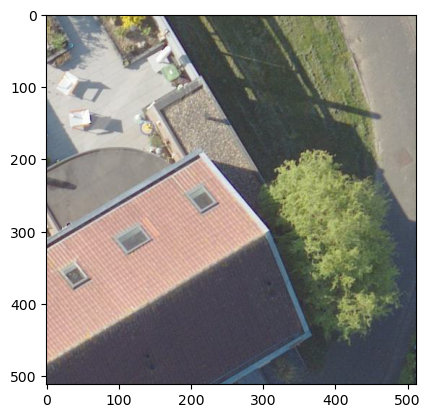

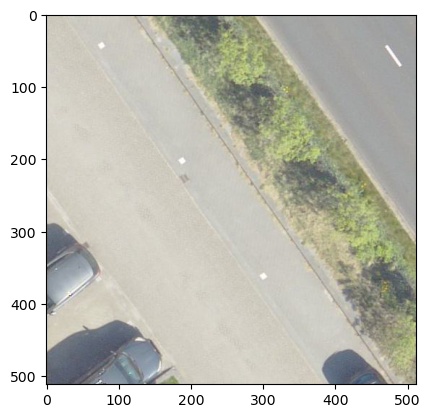

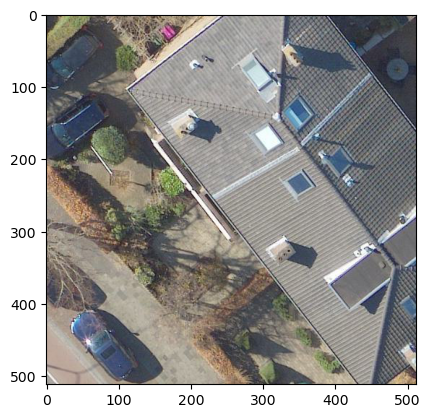

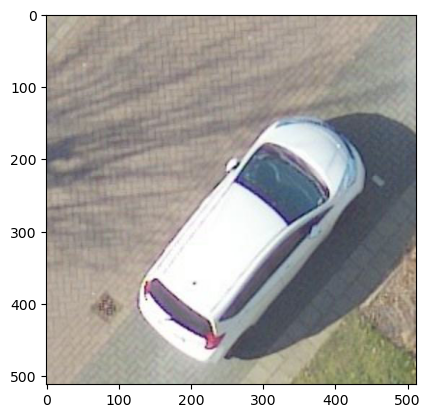

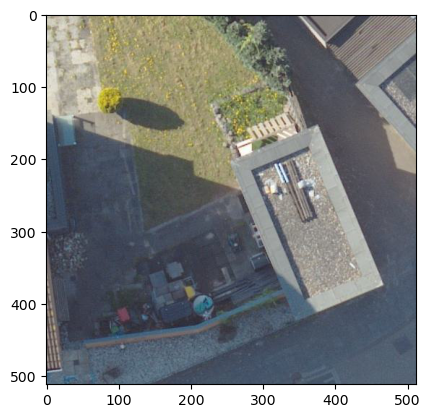

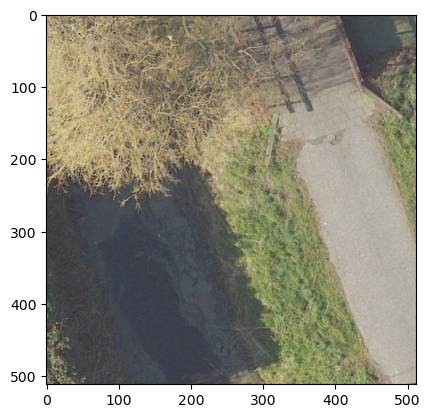

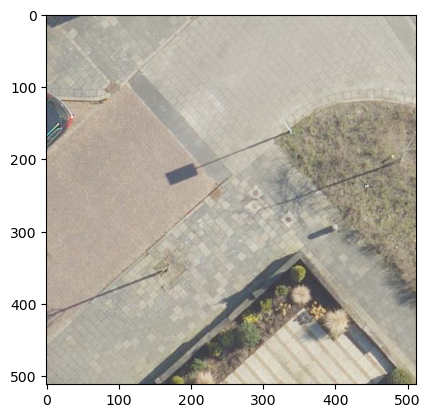

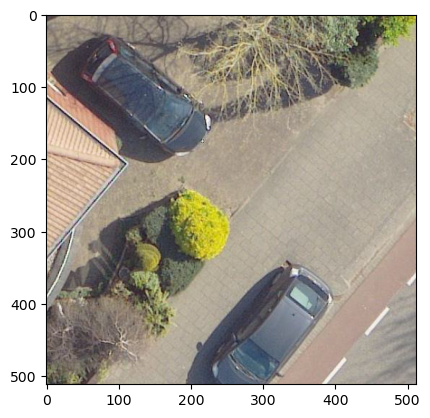

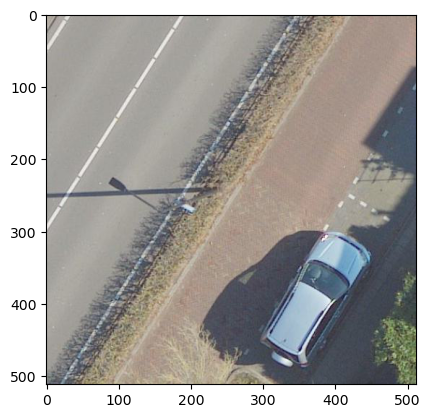

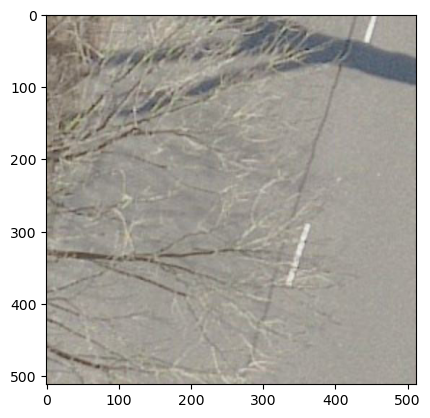

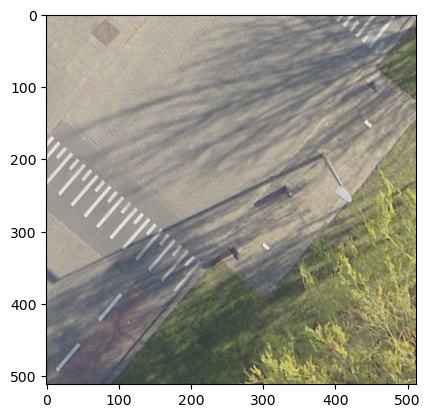

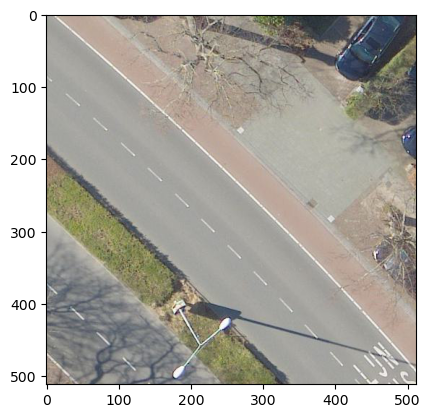

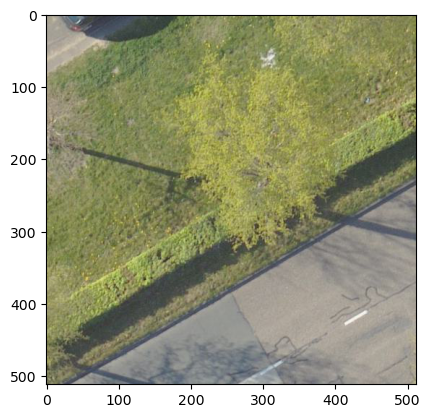

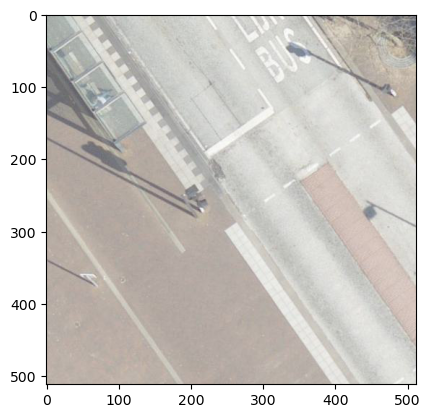

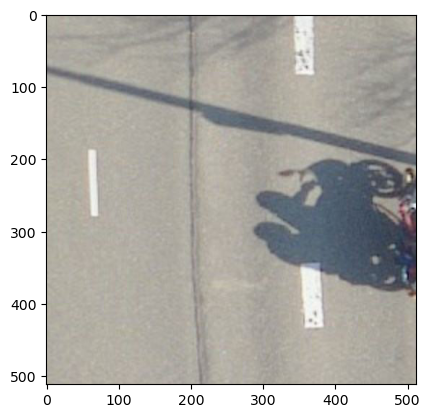

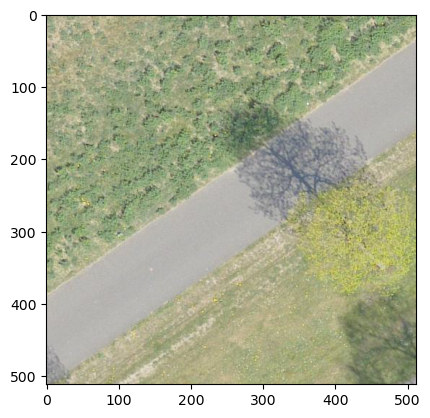

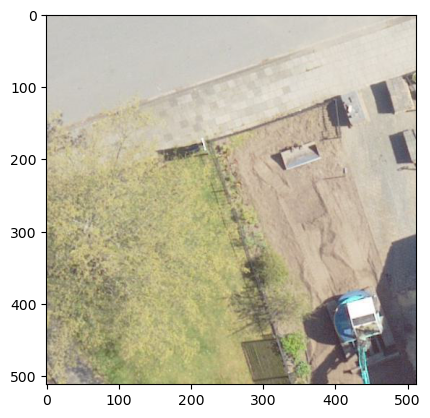

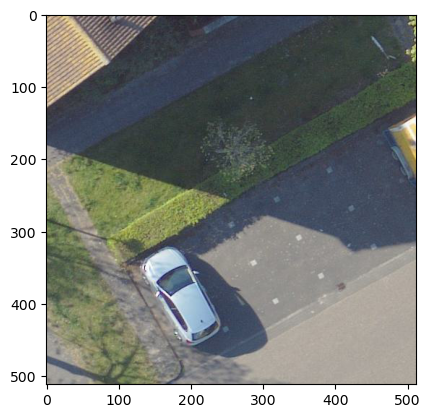

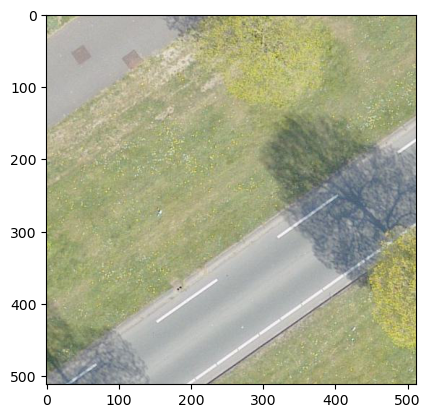

KeyboardInterrupt: 

In [8]:
for img in test_images_pickle:
    # Remove the batch dimension, convert to numpy, and transpose to (height, width, channels)
    img_np = img['img']
    img_np = img_np.squeeze(0).cpu().numpy().transpose((1, 2, 0))

    plt.imshow(img_np)
    plt.show()

In [9]:
from UNET import UNetBaseline
model = UNetBaseline(out_classes=1)

In [11]:
# Load the trained model
state_dict = torch.load(
    '/home/sfonseka/dev/SRST/srst-dataloader/experiments/UNET/asphalt/preliminary/runs/UNET_binary_grayscale_asphalt_1704597437.863613/models/best_model_UNET_binary_grayscale_asphalt_1704597437.863613.pt',
    map_location=torch.device('cpu'))

In [12]:
# Load the state dict into the model
model.load_state_dict(state_dict)
model.eval()  # Set the model to evaluation mode

UNetBaseline(
  (down_conv1): DownBlock(
    (double_conv): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (down_sample): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (down_conv2): DownBlock(
    (double_conv): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [ ]:
img_predictions = []
for img_to_pred in test_images_pickle[:2]:
    img = img_to_pred['img']
    img_np = img_to_pred['img_np']
    with torch.no_grad():
        output = model(img)
        
        img_predictions.append({
            'img_name': 'test_image',
            'img': img_to_pred,
            'output': output
        })
        
        
        # Move to CPU and convert to numpy
        output_np = output.cpu().numpy()
        output_binary_np = output.squeeze(0).squeeze(0).cpu().numpy()  # Squeeze the channel dimension
        
        
                # Convert to binary by thresholding
        output_binary = output_binary_np < 0.5


        # Plot the binary image
        plt.subplot(1, 2, 2)
        plt.imshow(output_binary, cmap='binary')
        plt.title('Predicted Image')

        plt.imshow(img_np, cmap='binary')


